In [1]:
import sys

sys.path.append(r"C:\Users\48501\Desktop\src")

In [2]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import interpolate
from sklearn import metrics

from src.plots import PlotData, plot_interpolation
from src import kernels
from src.conv import conv1d_interpolate

In [3]:
sns.set()

In [4]:
def simple(x):
    return np.sin(2*x)

def inverted_sin(x):
    return np.sin(np.power(x, -1))
    
def sign(x):
    return np.sign(np.sin(8*x))

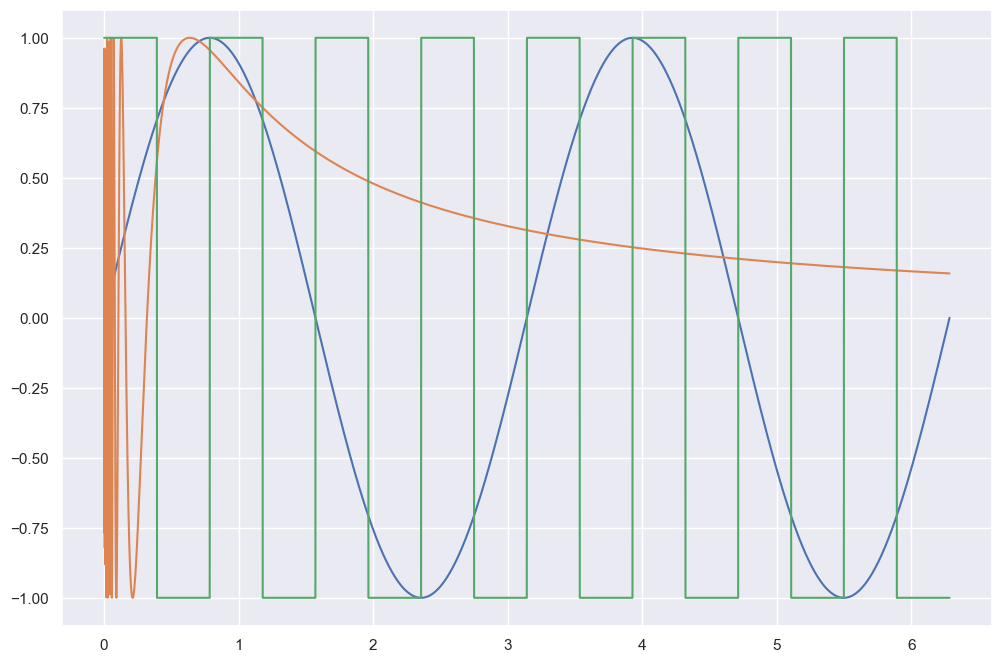

In [5]:
x = np.linspace(1e-6, 2*np.pi, 10_000)  # start from small epsilon to avoid division by zero

y_simple = simple(x)
y_sin_func = inverted_sin(x)
y_sgn_func = sign(x)

_ = plt.figure(figsize=[12, 8])

_ = plt.plot(x, y_simple)
_ = plt.plot(x, y_sin_func)
_ = plt.plot(x, y_sgn_func)

MSE: 0.00000108


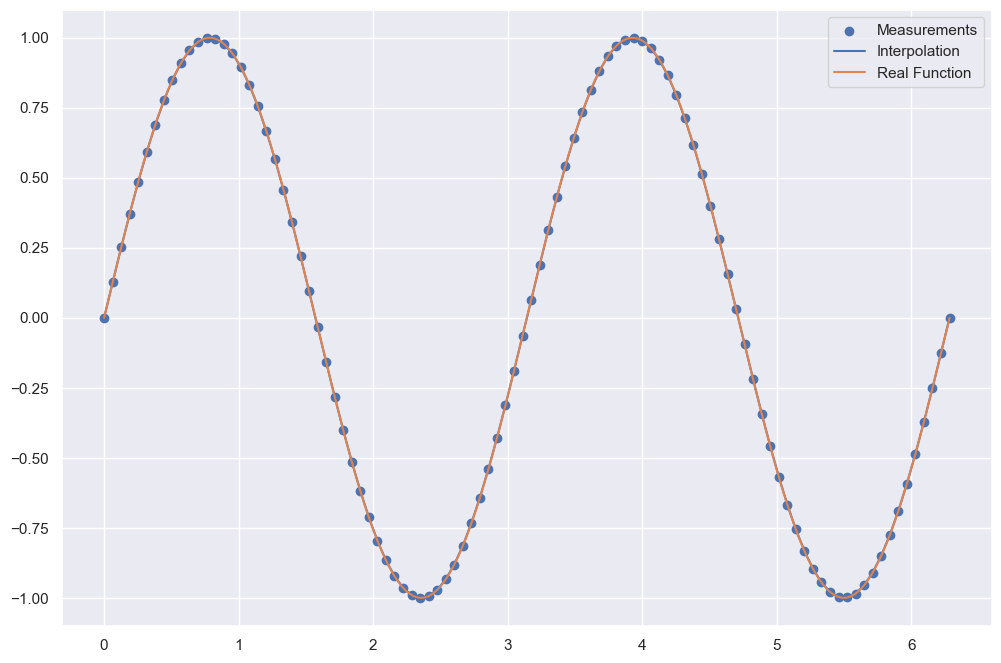

In [6]:
n_samples = 100 #ilość punktów, zmieniaj dla 100, 200, 400, 1000
n_predictions = 10_000

x = np.linspace(1e-6, 2*np.pi, n_samples)
y = simple(x)
    
x_interp = np.linspace(1e-6, 2*np.pi, n_predictions)
y_interp = np.interp(x_interp, x, y)
y_true = simple(x_interp)

print(f"MSE: {metrics.mean_squared_error(y_pred=y_interp, y_true=y_true):.8f}")
plot_interpolation(measure=PlotData(x=x, y=y), interpolation=PlotData(x=x_interp, y=y_interp), real=PlotData(x=x_interp, y=y_true))

MSE: 0.00479041


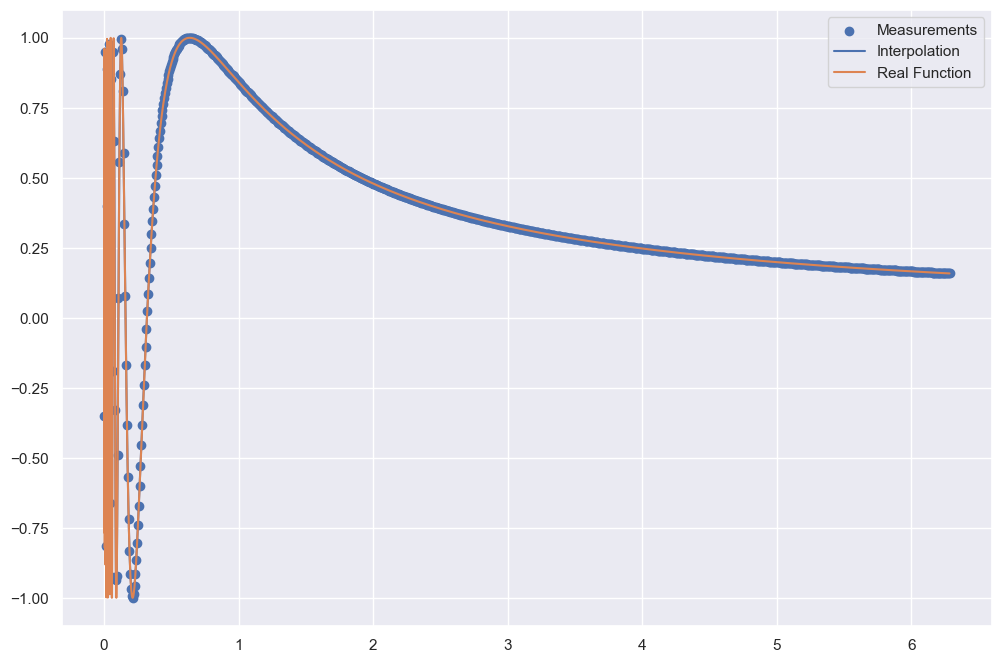

In [11]:
n_samples = 1000 #ilość punktów, zmieniaj dla 100, 200, 400, 1000
n_predictions = 10_000

x = np.linspace(1e-6, 2*np.pi, n_samples)
y = inverted_sin(x)
    
x_interp = np.linspace(1e-6, 2*np.pi, n_predictions)
y_interp = np.interp(x_interp, x, y)
y_true = inverted_sin(x_interp)

print(f"MSE: {metrics.mean_squared_error(y_pred=y_interp, y_true=y_true):.8f}")
plot_interpolation(measure=PlotData(x=x, y=y), interpolation=PlotData(x=x_interp, y=y_interp), real=PlotData(x=x_interp, y=y_true))

MSE: 0.00930221


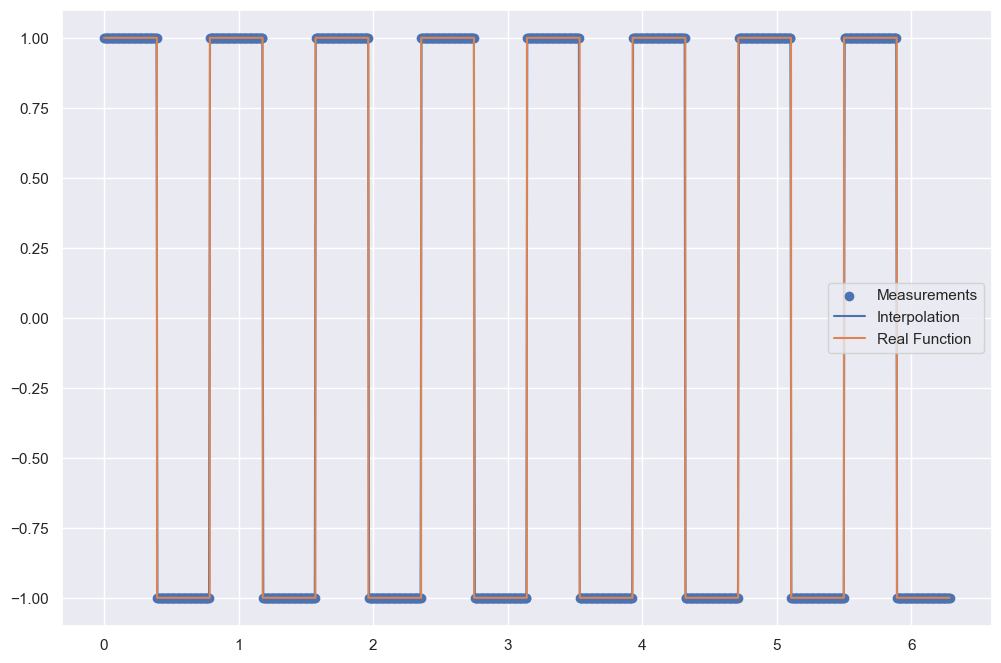

In [17]:
n_samples = 1000 #ilość punktów, zmieniaj dla 100, 200, 400, 1000
n_predictions = 10_000

x = np.linspace(1e-6, 2*np.pi, n_samples)
y = sign(x)
    
x_interp = np.linspace(1e-6, 2*np.pi, n_predictions)
y_interp = np.interp(x_interp, x, y)
y_true = sign(x_interp)

print(f"MSE: {metrics.mean_squared_error(y_pred=y_interp, y_true=y_true):.8f}")
plot_interpolation(measure=PlotData(x=x, y=y), interpolation=PlotData(x=x_interp, y=y_interp), real=PlotData(x=x_interp, y=y_true))